# BANK APP REVIEWS - BOA

In [168]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [169]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [170]:
warnings.filterwarnings("ignore")

In [171]:
# variable
BANK="BOA"

In [172]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [173]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/BOA_raw_reviews.csv (type=csv)


INFO:data.load_data:Data loaded successfully. Shape: (1000, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,937102c6-ae88-419c-994b-80e520faacb8,Phillmon Haftom,https://play-lh.googleusercontent.com/a/ACg8oc...,it's not working,3,0,25.05.03,2025-06-05 11:57:36,NaN,NaN
1,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,NaN,NaN
2,10e85f30-540d-4810-ba89-85a7e004480b,Haymanot Anberber,https://play-lh.googleusercontent.com/a/ACg8oc...,exceptional,5,0,NaN,2025-06-03 10:32:35,NaN,NaN
3,d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f,Mohamed Abdillahi,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA Mobile good bank,5,0,25.05.03,2025-06-02 14:25:12,NaN,NaN
4,2ca9480b-ff5f-4b59-952c-5921db83dab2,Ahadu tech,https://play-lh.googleusercontent.com/a-/ALV-U...,this is worest app 24/7 loading,1,0,25.05.03,2025-06-01 15:51:10,NaN,NaN


### Dataset Overview

In [174]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
85,1cfcfa11-67f5-4315-9f2d-f47ab27f0910,abrar yasin,https://play-lh.googleusercontent.com/a/ACg8oc...,Wonderfull app,5,0,NaN,2025-03-08 10:23:26,NaN,NaN
679,9eb34710-ad23-4a4a-81d3-929689a4b1ea,Ebrahim Lulseged,https://play-lh.googleusercontent.com/a/ACg8oc...,Need many improvements,2,0,NaN,2024-04-30 17:07:16,NaN,NaN
56,1197ad29-5063-4999-888c-589582754caa,Hone Boy,https://play-lh.googleusercontent.com/a/ACg8oc...,after activated the application it not allowed...,1,0,NaN,2025-03-31 23:55:06,NaN,NaN
893,e46bc4ad-e6b9-4caa-9f1f-abd982779c87,Sentayiw Fessha,https://play-lh.googleusercontent.com/a-/ALV-U...,ስንታየሁ,5,1,24.02.07,2024-02-24 19:14:01,NaN,NaN
631,e50a418d-ed60-4b67-ad3b-260b80f8d343,Liyu Ayalew,https://play-lh.googleusercontent.com/a/ACg8oc...,Great app than others,5,1,NaN,2024-05-02 21:08:03,NaN,NaN
16,fe22c72e-7fba-4ae7-9b4f-097bdb51cc61,Nurhussen Mohammed,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,25.05.03,2025-05-20 10:57:13,NaN,NaN
786,287a4512-6779-4d7b-ab55-fb237935980b,Kefyalew Birara,https://play-lh.googleusercontent.com/a-/ALV-U...,Not work this app ...what is the problem,1,0,NaN,2024-04-20 12:49:04,NaN,NaN
6,d9172c66-a605-4626-acc6-e1dbca0685cd,Mansour Abdulkadir,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA system is confartable,5,0,25.05.03,2025-06-01 00:47:32,NaN,NaN
252,5d940978-07d3-41d9-81b1-74867eb724a3,Anteneh Car Sale,https://play-lh.googleusercontent.com/a-/ALV-U...,The App's crash always.. Error.....,3,0,24.07.04,2024-09-27 16:25:54,NaN,NaN
284,3283f02f-0474-44ec-b7d6-5e90c94d88d4,et spam,https://play-lh.googleusercontent.com/a/ACg8oc...,Awesome application. But lately its crashing e...,4,0,24.07.04,2024-09-05 23:48:22,NaN,NaN


In [175]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
995,7e629e12-154b-4482-a805-90bf721f5011,Sha net,https://play-lh.googleusercontent.com/a/ACg8oc...,I don't have words for your great work.. Reall...,5,30,24.01.09,2024-02-03 19:07:15,NaN,NaN
996,832b30a2-1ab9-476f-838d-e96b1f50da03,Abebayehu mussa,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice,5,2,24.01.09,2024-02-03 16:46:47,NaN,NaN
997,000ef73f-978b-4c50-a44a-9c57cbc5c69e,ww,https://play-lh.googleusercontent.com/a/ACg8oc...,A massive improvement from the previous app. M...,5,6,24.01.09,2024-02-03 13:04:16,NaN,NaN
998,a0cf0ff4-f795-42d9-ada0-e31effdbc5ab,Kassahun Berihun,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,2,24.01.09,2024-02-03 12:47:25,NaN,NaN
999,e6c09bb3-ef33-47b7-99c3-3b6b20ea79b8,Beti Abreham,https://play-lh.googleusercontent.com/a/ACg8oc...,Boa,5,2,NaN,2024-02-03 12:24:09,NaN,NaN


In [176]:
#shape of the dataset
df.shape

(1000, 10)

In [177]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [178]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1000.0,3.020,1.859855,1.0,1.0,3.0,5.0,5.0
thumbsUpCount,1000.0,9.131,74.395999,0.0,0.0,1.0,1.0,1810.0


In [179]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,1000,1000,e6c09bb3-ef33-47b7-99c3-3b6b20ea79b8,1
userName,1000,994,Kidus Yohannes,2
userImage,1000,999,https://play-lh.googleusercontent.com/a-/ALV-U...,2
content,1000,856,Good,43
reviewCreatedVersion,728,10,24.02.07,146
at,1000,1000,2024-02-03 12:24:09,1
replyContent,23,8,Thank you very much. Keep using our app,8
repliedAt,23,23,2024-02-22 15:40:34,1


In [180]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1000 non-null   object
 1   userName              1000 non-null   object
 2   userImage             1000 non-null   object
 3   content               1000 non-null   object
 4   score                 1000 non-null   int64 
 5   thumbsUpCount         1000 non-null   int64 
 6   reviewCreatedVersion  728 non-null    object
 7   at                    1000 non-null   object
 8   replyContent          23 non-null     object
 9   repliedAt             23 non-null     object
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


In [181]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                1000
at                      1000
userImage                999
userName                 994
content                  856
thumbsUpCount             53
repliedAt                 23
reviewCreatedVersion      10
replyContent               8
score                      5
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [182]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [183]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
repliedAt,977,97.70%
replyContent,977,97.70%
reviewCreatedVersion,272,27.20%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
thumbsUpCount,0,0.00%
score,0,0.00%
content,0,0.00%
at,0,0.00%


### Missing Values

In [184]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,272,27.20%


### Duplicates

In [185]:
#count duplicates
dq.count_duplicates()

np.int64(0)

In [186]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [187]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [188]:
#saving the original dataset for later use
df_original=df.copy()

In [189]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
29,e4f9ad9a-576a-4bbe-a910-812fd1b7e08a,Amnuel Gashaw Aman,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,NaN,2025-05-06 17:44:32,NaN,NaN
695,a0ffc2f3-5b01-4f69-b9fa-ebca3e358bce,Amir Mohammed,https://play-lh.googleusercontent.com/a-/ALV-U...,It doesn't function properly!! You don't even ...,1,2,24.04.26,2024-04-29 23:09:32,NaN,NaN
589,63a101fb-cc46-41f6-a9cc-c494cb516a50,Yordanos Getu,https://play-lh.googleusercontent.com/a/ACg8oc...,"Doesn't work properly, keeps closing won't act...",1,0,NaN,2024-05-05 19:15:19,NaN,NaN
232,e3dac0d5-d198-42ee-8536-2d6fd0365164,Abdu Ahme,https://play-lh.googleusercontent.com/a/ACg8oc...,Best app to me,5,1,24.09.30,2024-10-11 21:16:21,NaN,NaN
642,699d2980-f449-42c2-bf45-6f892e768961,wondimagegn mekebo,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,3,0,24.04.26,2024-05-02 13:21:00,NaN,NaN


In [190]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [191]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
571,c20f2730-8f04-4bb5-b0df-0201b263e3e6,Alazar Mulat,https://play-lh.googleusercontent.com/a-/ALV-U...,It's not functional at all,1,1,24.05.07,2024-05-08 17:27:40,NaN,NaN
40,df1d7402-68cb-4f20-ae7f-d02866690692,Shimelis Keterew,https://play-lh.googleusercontent.com/a/ACg8oc...,አይከፍትም እኮ,1,0,25.03.07,2025-04-17 10:12:16,NaN,NaN
85,1cfcfa11-67f5-4315-9f2d-f47ab27f0910,abrar yasin,https://play-lh.googleusercontent.com/a/ACg8oc...,Wonderfull app,5,0,NaN,2025-03-08 10:23:26,NaN,NaN
44,6474e6df-7925-4e06-a67b-944237843b02,Mezemir Haset,https://play-lh.googleusercontent.com/a/ACg8oc...,nice,5,0,NaN,2025-04-09 04:01:08,NaN,NaN
791,e77d5a08-ede0-4425-b8aa-7e0b27dd07ba,Feti Jemal,https://play-lh.googleusercontent.com/a-/ALV-U...,Hey no working,5,1,24.02.07,2024-04-19 22:02:58,NaN,NaN


In [192]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] No completely empty columns found.


In [193]:
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,272,27.20%


In [194]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion','replyContent','repliedAt'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt']


In [195]:
dq.find_invalid_values()

{}

In [196]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [197]:
# df=await dq.translate_non_english_text("content")

In [198]:
df.shape

(1000, 5)

In [199]:
df=dq.filter_english_text("content")

[INFO] Dropped 361 non-English rows from 'content' column.


### Inconsistencies and Inaccuracies

In [200]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [201]:
df=dq.convert_columns_to_datetime()

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 1 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       639 non-null    object
 1   content        639 non-null    object
 2   score          639 non-null    int64 
 3   thumbsUpCount  639 non-null    int64 
 4   at             639 non-null    object
dtypes: int64(2), object(3)
memory usage: 30.0+ KB


In [203]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [204]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [205]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [206]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
972,I am having a challenge to use the app. The ap...,3,2024-02-06 19:31:28,Mahider Mulugeta,3,BOA,Google Store
712,The update app is the worest one when i compar...,1,2024-04-28 23:14:58,M A,3,BOA,Google Store
243,I'm living out of country how may I download a...,1,2024-10-04 05:30:33,Pastor Yirdaw Tessema,1,BOA,Google Store
784,Very very bad app,1,2024-04-21 09:19:47,Nesrela Rdwan,0,BOA,Google Store
562,Ethiopia,5,2024-05-09 21:34:00,Abrham King,1,BOA,Google Store
767,I like this bank by his activity and respect c...,5,2024-04-22 20:01:19,Haylush Haylemaryam,2,BOA,Google Store
242,"Stop telling me what to do with my phone, BOA....",1,2024-10-04 05:55:49,Eyuel Hailu,14,BOA,Google Store
191,The worst app update ever. Why would you inclu...,1,2024-11-17 22:11:45,Daniel Berhanu,22,BOA,Google Store
615,This is too poorer than the previous app.,1,2024-05-03 13:38:01,Yonatan Tekle,0,BOA,Google Store
223,"What's up I can't log in, what's wrong",5,2024-10-22 05:57:44,Yordanos Yigzaw,1,BOA,Google Store


## 6. Analyze & Visualize

In [207]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


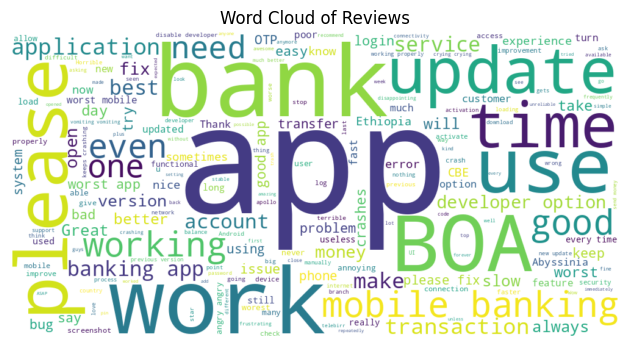

In [208]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


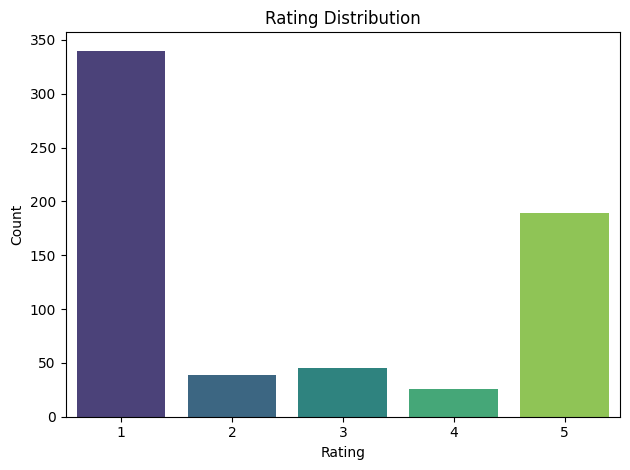

In [209]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


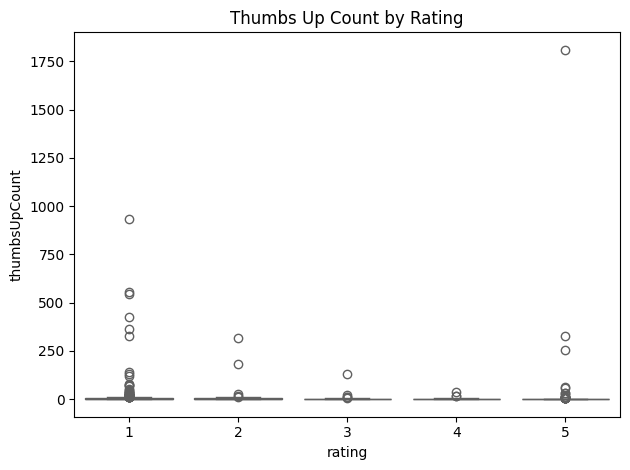

In [210]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


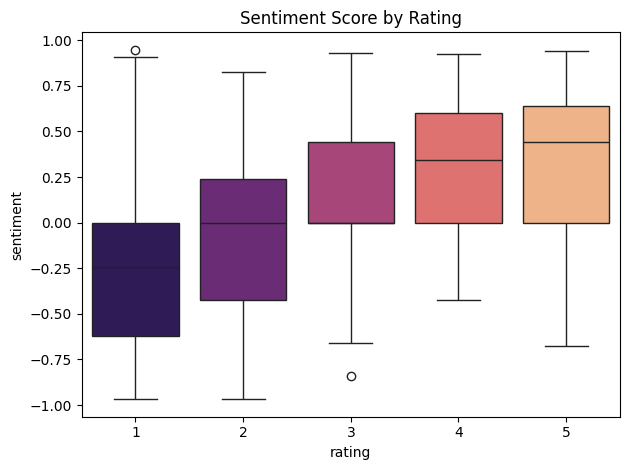

In [211]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [212]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


### Export Cleaned Data

In [213]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [214]:
df.sample(15)

,review,rating,date,bank,source
543,I don't get why this app is developed it is no...,1,2024-05-12 17:48:54,BOA,Google Store
609,Actually faster,4,2024-05-03 19:45:11,BOA,Google Store
729,Very old app is disgusting,1,2024-04-25 21:16:19,BOA,Google Store
166,I’m giving this app one star because there are...,1,2024-12-07 22:40:19,BOA,Google Store
252,The App's crash always.. Error.....,3,2024-09-27 16:25:54,BOA,Google Store
25,i entered incorrect security question by mista...,5,2025-05-10 12:44:44,BOA,Google Store
131,Great,5,2025-01-04 16:59:09,BOA,Google Store
466,Really Bank,5,2024-06-12 02:58:51,BOA,Google Store
666,It doesn't work anymore,1,2024-05-01 10:23:02,BOA,Google Store
793,It's good app tnx for u new update it's very e...,5,2024-04-18 16:02:06,BOA,Google Store
